In [1427]:
from geopy.geocoders import Nominatim
from geopy.distance import great_circle
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import norm
import mysql.connector
from sqlalchemy import create_engine
import pymysql

In [1428]:
# dataframe:
df = pd.read_csv('C:\\Users\\mojiway\\Desktop\\recom\\recom_table_2.csv',index_col=None)

In [1429]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390


In [1430]:
df['commission'] =  0.15

In [1431]:
df.head()

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15


In [1432]:
# input fields:
selected_hotel_id = 311703
#lat_input =  13.72069246
#lon_input = 100.51398
#distance_input = 5
#stars_input = '4-stars
selected_hotel_city = df.loc[df['Hotel_ID'] == selected_hotel_id, 'city'].values[0]
selected_hotel_stars = df.loc[df['Hotel_ID'] == selected_hotel_id, 'stars'].values[0]
selected_hotel_lat = df.loc[df['Hotel_ID'] == selected_hotel_id, 'lat'].values[0]
selected_hotel_lon = df.loc[df['Hotel_ID'] == selected_hotel_id, 'lon'].values[0]

In [1433]:
selected_hotel_city, selected_hotel_stars, selected_hotel_lat, selected_hotel_lon

('Nassau', '4-star', 25.070795999999998, -77.396624)

In [1434]:
# data slicing based on the distribution:
def dist(col):
    mean, std = norm.fit(col)
    p0 = mean + 2 * std
    p1 = mean + std
    p2 = mean
    p3 = mean-std if std < mean else mean-0.4*std
    return p0, p1, p2, p3

In [1435]:
gbv_rns_slices = dist(df['GBV_per_RNS'])
df.loc[df['GBV_per_RNS'] > gbv_rns_slices[0], 'gbv_rns_rank'] = 1000
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[0]) & (df['GBV_per_RNS'] > gbv_rns_slices[1]) , 'gbv_rns_rank'] = 750
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[1]) & (df['GBV_per_RNS'] > gbv_rns_slices[2]) , 'gbv_rns_rank'] = 500
df.loc[(df['GBV_per_RNS'] <gbv_rns_slices[2]) & (df['GBV_per_RNS'] > gbv_rns_slices[3]) , 'gbv_rns_rank'] = 250
df.loc[df['GBV_per_RNS'] < gbv_rns_slices[3], 'gbv_rns_rank'] = 100

In [1436]:
df['estimated_revenue'] = df['gbv_rns_rank'] * df['commission']

In [1437]:

estimated_revenue_slices = dist(df['estimated_revenue'])
df.loc[df['estimated_revenue'] > estimated_revenue_slices[0], 'revenue_rank'] = 1000
df.loc[(df['estimated_revenue']< estimated_revenue_slices[0]) & (df['estimated_revenue'] > estimated_revenue_slices[1]) , 'revenue_rank'] = 750
df.loc[(df['estimated_revenue']< estimated_revenue_slices[1]) & (df['estimated_revenue'] > estimated_revenue_slices[2]) , 'revenue_rank'] = 500
df.loc[(df['estimated_revenue']< estimated_revenue_slices[2]) & (df['estimated_revenue'] > estimated_revenue_slices[3]) , 'revenue_rank'] = 250
df.loc[df['estimated_revenue'] < estimated_revenue_slices[3], 'revenue_rank'] = 100


In [1438]:
gbv_rns_slices

(436.14003498631484,
 301.48371718355986,
 166.82739938080496,
 32.171081578050035)

In [1439]:
df['city_rank'] = np.where(df['city'] == selected_hotel_city, 1, 0)

In [1440]:
df['star_rank'] = np.where(df['stars']== selected_hotel_stars, 1, 0)

In [1441]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0,1
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0,0
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,1,1
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,0,0
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0,0
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0,1
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0,0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0,0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0,0
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0,0


In [1442]:

booking_slices = dist(df['bookings'])
df.loc[df['bookings'] > booking_slices[0], 'booking_rank'] = 1000
df.loc[(df['bookings'] < booking_slices[0]) & (df['bookings'] > booking_slices [1]) , 'booking_rank'] = 750
df.loc[(df['bookings'] <booking_slices[1]) & (df['bookings'] > booking_slices [2]) , 'booking_rank'] = 500
df.loc[(df['bookings'] < booking_slices[2]) & (df['bookings'] > booking_slices [3]) , 'booking_rank'] = 250
df.loc[df['bookings'] < booking_slices[3], 'booking_rank'] = 100

In [1443]:
booking_slices

(9.279818707452664, 5.617463533292895, 1.9551083591331269, 0.49016628946921936)

In [1444]:
df

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,commission_earned,commission,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,27007,143,1648,0.15,250.0,37.5,250.0,0,1,1000.0
1,53230,Marrakech,La Mamounia,5-star,31.621885,-7.997605,5,11,9068,824,553,0.15,1000.0,150.0,1000.0,0,0,500.0
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,8416,234,514,0.15,500.0,75.0,500.0,1,1,750.0
3,8303,Bangkok,Shangri-La Hotel Bangkok,5-star,13.720692,100.513980,10,30,8151,272,497,0.15,500.0,75.0,500.0,0,0,1000.0
4,8519,Bali,Four Seasons Resort Bali at Sayan,5-star,-8.495717,115.244937,5,18,7877,438,481,0.15,1000.0,150.0,1000.0,0,0,500.0
5,134368,Hoboken,W Hoboken,4-star,40.739162,-74.027744,17,32,7438,232,454,0.15,500.0,75.0,500.0,0,1,1000.0
6,55850,San Francisco,Hotel Union Square,3-star,37.785872,-122.407731,13,38,7267,191,444,0.15,500.0,75.0,500.0,0,0,1000.0
7,67930,New York,Hotel Pennsylvania,2-star,40.749943,-73.990941,17,38,6742,177,416,0.15,500.0,75.0,500.0,0,0,1000.0
8,896,Phuket,Twinpalms Phuket Hotel,5-star,7.977388,98.280226,3,15,6524,435,398,0.15,750.0,112.5,750.0,0,0,500.0
9,64912,Honolulu,Alohilani Resort Waikiki Beach,3-star,21.274273,-157.823954,5,19,6344,334,390,0.15,750.0,112.5,750.0,0,0,500.0


In [1445]:
gbv_slices = dist(df['GBV'])
df.loc[df['GBV'] > gbv_slices[0], 'GBV'] = 1000
df.loc[(df['GBV'] < gbv_slices[0]) & (df['GBV'] > gbv_slices[1]) , 'gbv_rank'] = 750
df.loc[(df['GBV'] < gbv_slices[1]) & (df['GBV'] >gbv_slices[2]) , 'gbv_rank'] = 500
df.loc[(df['GBV'] < gbv_slices[2]) & (df['GBV'] > gbv_slices[3]) , 'gbv_rank'] = 250
df.loc[df['GBV'] < gbv_slices[3], 'gbv_rank'] = 100

In [1446]:
#gbv_slices

In [1447]:
def distancer(row):
    coords_1 = (row['lat'], row['lon'])
    coords_2 = (selected_hotel_lat, selected_hotel_lon)
    return round(great_circle(coords_1, coords_2).miles, 2)
df['distance'] = df.apply(distancer, axis=1)


In [1448]:


df.loc[df['distance'] <= 0.5, 'distance_rank'] = 1000
df.loc[(df['distance'] > 0.5) & (df['distance'] <= 1) , 'distance_rank'] = 750
df.loc[(df['distance'] > 1) & (df['distance'] <= 2 ) , 'distance_rank'] = 500
df.loc[(df['distance'] > 2) & (df['distance'] <= 5) , 'distance_rank'] = 250
df.loc[df['distance'] > 5, 'distance_rank'] = 100

(array([ 2., 52., 36.,  5.,  0., 10.,  7., 15.,  7., 35., 17., 24., 14.,
         1.,  2.,  7.,  0.,  3.,  7.,  4., 24., 43.,  8.,  8., 17., 13.,
         0.,  0.,  1.,  0.,  0.,  3.,  2.,  3., 14., 12., 16., 47., 34.,
        25.,  4., 26., 32., 41., 15.,  5.,  5.,  0.,  3., 15.,  1., 10.,
         0.,  1.,  1.,  6.,  1.,  2.,  0.,  0.,  1.,  1.,  3.,  0.,  8.,
        25.,  3., 29., 10.,  7.,  6.,  6.,  7.,  1.,  3.,  3., 15.,  3.,
        24.,  0.,  6., 44., 39., 10., 66., 50.,  3.,  9., 41., 14.,  6.,
        23., 52.,  2.,  0., 40., 39.,  0.,  0.,  7.]),
 array([    0.    ,   115.1288,   230.2576,   345.3864,   460.5152,
          575.644 ,   690.7728,   805.9016,   921.0304,  1036.1592,
         1151.288 ,  1266.4168,  1381.5456,  1496.6744,  1611.8032,
         1726.932 ,  1842.0608,  1957.1896,  2072.3184,  2187.4472,
         2302.576 ,  2417.7048,  2532.8336,  2647.9624,  2763.0912,
         2878.22  ,  2993.3488,  3108.4776,  3223.6064,  3338.7352,
         3453.864 ,  3568.

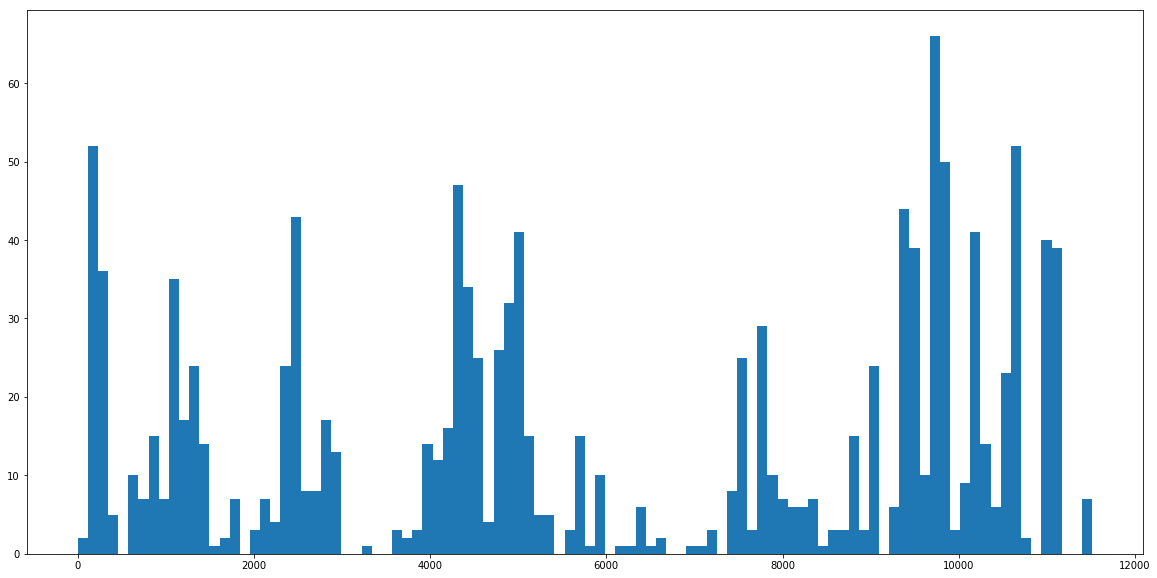

In [1449]:
plt.figure(figsize=(20,10))
plt.hist(df['distance'], bins=100)

In [1450]:
df['rnk'] = (2*df['gbv_rns_rank'] + 2*df['booking_rank'] \
             + 2*df['gbv_rank'] + 5*df['estimated_revenue'] + 5* df['distance_rank'])*df['city_rank'] * df['star_rank']


In [1451]:
df.sort_values(by=['rnk'], ascending=False)

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,...,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank,gbv_rank,distance,distance_rank,rnk
2,311703,Nassau,Grand Hyatt At Baha Mar,4-star,25.070796,-77.396624,7,36,1000,234,...,500.0,75.0,500.0,1,1,750.0,500.0,0.00,1000.0,8875.0
0,242495,Boston,The Godfrey Hotel Boston,4-star,42.354662,-71.061475,107,189,1000,143,...,250.0,37.5,250.0,0,1,1000.0,500.0,1247.51,100.0,0.0
858,2658,Cameron Highlands,Century Pines Resort,4-star,4.471865,101.381074,1,4,184,46,...,250.0,37.5,250.0,0,1,250.0,100.0,10393.96,100.0,0.0
866,64285,Fort Lauderdale,Pier 66 Hotel Marina,4-star,26.101497,-80.114516,1,1,179,179,...,500.0,75.0,500.0,0,1,250.0,100.0,183.73,100.0,0.0
865,61350,Orlando,Hampton Inn Orlando - S. of Universal Studios,3-star,28.459239,-81.459358,1,1,179,179,...,500.0,75.0,500.0,0,0,250.0,100.0,342.92,100.0,0.0
864,192991,Istanbul,Istanbul Gonen Hotel,5-star,41.010639,28.817169,1,3,179,60,...,250.0,37.5,250.0,0,0,250.0,100.0,5872.73,100.0,0.0
863,63333,San Diego,Manchester Grand Hyatt San Diego,4-star,32.710295,-117.168215,1,1,180,180,...,500.0,75.0,500.0,0,1,250.0,100.0,2448.38,100.0,0.0
862,64797,Seaside,Shilo Inn Suites Hotel - Seaside Oceanfront,3-star,45.993526,-123.929671,1,1,180,180,...,500.0,75.0,500.0,0,0,250.0,100.0,2934.08,100.0,0.0
861,8166,Melbourne,ibis styles Kingsgate Hotel,3-star,-37.816942,144.955740,1,2,182,91,...,250.0,37.5,250.0,0,0,250.0,100.0,9815.13,100.0,0.0
860,1304,Jakarta,The Sultan Hotel & Residence,5-star,-6.218387,106.809331,2,2,182,91,...,250.0,37.5,250.0,0,0,500.0,100.0,11104.85,100.0,0.0


(array([ 49.,  84., 112.,  91.,  85.,  69.,  56.,  56.,  43.,  39.,  37.,
         30.,  34.,  27.,  12.,  29.,  19.,  12.,  20.,  14.,  17.,  16.,
         13.,  18.,   7.,  14.,   9.,  12.,  12.,   9.,  10.,  48.,   5.,
          7.,   8.,   9.,   7.,   3.,   5.,   8.,   4.,   5.,   2.,   1.,
          4.,   5.,   8.,   9.,   4.,   3.,   1.,   3.,   2.,   2.,   1.,
          2.,   8.,   5.,   1.,   4.,   1.,   2.,   2.,   1.,   5.,   1.,
          2.,   2.,   2.,   1.,   2.,   5.,   0.,   0.,   3.,   4.,   0.,
          2.,   1.,   4.,   2.,   2.,   2.,   2.,   0.,   2.,   2.,   0.,
          0.,   3.,   0.,   0.,   3.,   1.,   0.,   2.,   0.,   0.,   1.,
          1.]),
 array([  18.  ,   49.44,   80.88,  112.32,  143.76,  175.2 ,  206.64,
         238.08,  269.52,  300.96,  332.4 ,  363.84,  395.28,  426.72,
         458.16,  489.6 ,  521.04,  552.48,  583.92,  615.36,  646.8 ,
         678.24,  709.68,  741.12,  772.56,  804.  ,  835.44,  866.88,
         898.32,  929.76,  961.2 ,

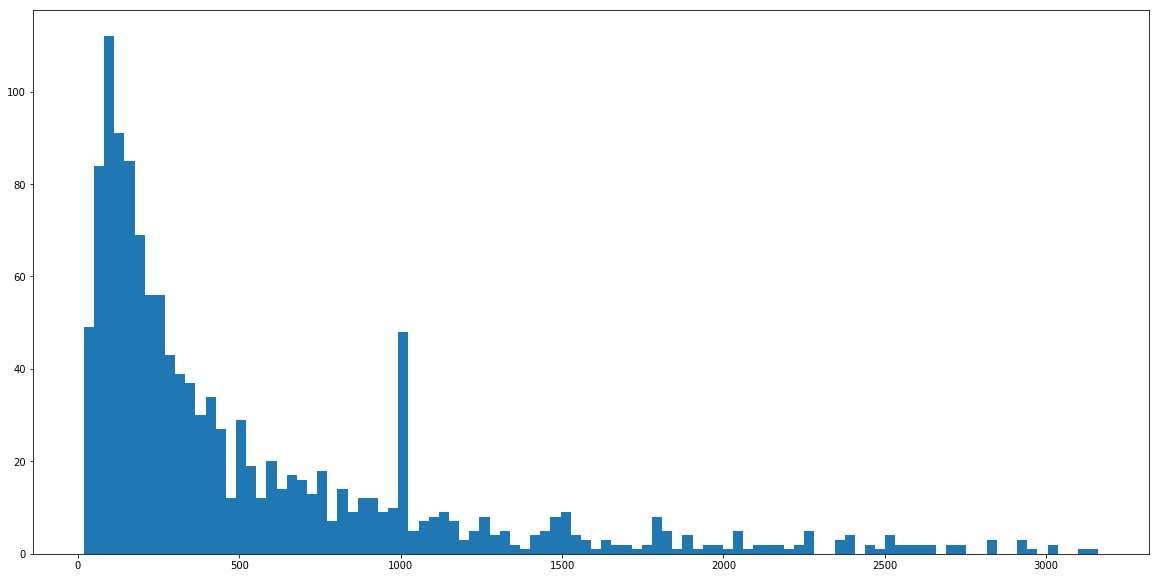

In [1452]:
plt.figure(figsize=(20,10))
plt.hist(df['GBV'], bins=100)

In [1453]:
dist(df['GBV'])

(1741.3944512303797, 1142.6898726740133, 543.9852941176471, 304.50346269510055)

In [1454]:
mean, std = norm.fit(df['GBV'])

In [1455]:
mean, std

(543.9852941176471, 598.7045785563663)

In [1456]:

df = df[df['rnk'] != 0]
df = df[df['distance'] != 0]
#df_final = df.sort_values(['distance', 'rnk'], ascending=[1,0]).reset_index(drop=True)
df_final = df.sort_values('rnk', ascending=False).reset_index(drop=True)

In [1457]:
df_final

,Hotel_ID,city,hotel_name,stars,lat,lon,bookings,RNS,GBV,GBV_per_RNS,...,gbv_rns_rank,estimated_revenue,revenue_rank,city_rank,star_rank,booking_rank,gbv_rank,distance,distance_rank,rnk


In [1458]:
db = mysql.connector.connect(
      host="127.0.0.1",
      user="root",
      passwd="",
      database="recommenation_simulation",
      buffered=True
)
cursor = db.cursor()

In [1459]:
results = df_final[['Hotel_ID','city','hotel_name','stars','bookings','RNS','GBV','GBV_per_RNS','distance','estimated_revenue','rnk']]

In [1460]:
results

,Hotel_ID,city,hotel_name,stars,bookings,RNS,GBV,GBV_per_RNS,distance,estimated_revenue,rnk


In [1461]:
#results.reset_index(level=0, inplace=True)

In [1462]:
results.head()

,Hotel_ID,city,hotel_name,stars,bookings,RNS,GBV,GBV_per_RNS,distance,estimated_revenue,rnk


In [1463]:
results = results.reset_index()
try:
    results.values[0] = 'id'
    results['id'] =results.index + 1  
    results = results[['id','Hotel_ID','city','hotel_name','stars','bookings','RNS','GBV','GBV_per_RNS','distance','estimated_revenue','rnk']]
except Exception:
    pass



In [1464]:
results

,index,Hotel_ID,city,hotel_name,stars,bookings,RNS,GBV,GBV_per_RNS,distance,estimated_revenue,rnk


In [1465]:
engine = create_engine("mysql+pymysql://root:@localhost/recommenation_simulation")

In [1466]:
results.head(20).to_sql(name='hotel_based', con=engine, if_exists = 'replace', index=False)